In [1]:
import pandas as pd
import numpy as np
import folium
from folium.plugins import HeatMap
from folium import plugins
import matplotlib.pyplot as plt
from bokeh.plotting import figure,show
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource, FactorRange, Legend

In [2]:
readData = pd .read_csv("Motor_Vehicle_Collisions_-_Crashes.csv", parse_dates=['CRASH DATE'])
readData = readData[(readData['LATITUDE'].notna())]
readData = readData[(readData['LONGITUDE'].notna())]


focusCrashes = ['Driver Inattention/Distraction', 'Failure to Yield Right-of-Way', 'Following Too Closely', 'Fatigued/Drowsy', 'Unsafe Speed', 'Alcohol Involvement', 'Pavement Slippery', 'Passenger Distraction', 'Driver Inexperience', 'Turning Improperly']

C:\Users\Dolphin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
data = readData
data['CRASH TIME'] = pd.to_datetime(data['CRASH TIME'], format="%H:%M")
data['CRASH TIME'] = data['CRASH TIME'].dt.hour

#data = data.sample(50000)

In [4]:
#lat =  40.76416398327681
#lon = -73.97941864394394
#NYCmap = folium.Map([lat, lon], zoom_start=13)
#crashHeat= [[row['LATITUDE'],row['LONGITUDE']] for index, row in data.iterrows()]
#for index in crashHeat:
#    folium.CircleMarker([index[0],index[1]],
#              color = 'red',
#              radius = 1
#             ).add_to(NYCmap)
#HeatMap(crashHeat, radius=10, max_zoom=5).add_to(NYCmap)
#NYCmap

<AxesSubplot:xlabel='CRASH TIME'>

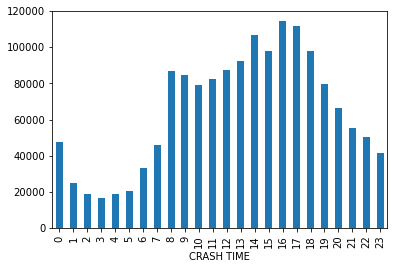

In [5]:
crashHours = data.groupby('CRASH TIME').size()
crashHours.plot(kind = 'bar')

In [6]:
data.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
2,2015-05-06,12,NaN,NaN,40.750368,-73.752802,"(40.7503678, -73.7528022)",NaN,NaN,NaN,...,Unspecified,NaN,NaN,NaN,3216396,LARGE COM VEH(6 OR MORE TIRES),PASSENGER VEHICLE,NaN,NaN,NaN
3,2015-05-19,18,BRONX,10474,40.819433,-73.889712,"(40.8194332, -73.8897118)",GARRISON AVENUE,HUNTS POINT AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,3223531,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN
4,2015-04-28,7,MANHATTAN,10016,40.743474,-73.976759,"(40.7434737, -73.9767593)",EAST 32 STREET,2 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,3210389,SMALL COM VEH(4 TIRES),PASSENGER VEHICLE,NaN,NaN,NaN
5,2015-05-19,9,MANHATTAN,10029,40.787859,-73.951610,"(40.7878593, -73.9516098)",EAST 98 STREET,PARK AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,3223479,PASSENGER VEHICLE,VAN,NaN,NaN,NaN
6,2015-05-20,20,MANHATTAN,10013,40.723626,-74.004788,"(40.7236259, -74.0047875)",WATTS STREET,AVENUE OF THE AMERICAS,NaN,...,Turning Improperly,NaN,NaN,NaN,3224628,OTHER,PASSENGER VEHICLE,NaN,NaN,NaN


In [7]:
#data['CONTRIBUTING FACTOR VEHICLE 1'].value_counts().plot(kind='bar')

In [8]:
focusCrashdf = data[data['CONTRIBUTING FACTOR VEHICLE 1'].isin(focusCrashes)]
sum_df_kill = focusCrashdf.groupby(['CONTRIBUTING FACTOR VEHICLE 1']).agg({'NUMBER OF PERSONS KILLED': 'sum'})
sum_df_injured = focusCrashdf.groupby(['CONTRIBUTING FACTOR VEHICLE 1']).agg({'NUMBER OF PERSONS INJURED': 'sum'})
sum_df_kill.columns = ['AVERAGE PERSONS KILLED']
sum_df_injured.columns = ['AVERAGE PERSONS INJURED']
for x in focusCrashes:
    sum_df_kill.loc[x] = sum_df_kill.loc[x] / focusCrashdf[focusCrashdf['CONTRIBUTING FACTOR VEHICLE 1'] == x].size
    sum_df_injured.loc[x] = sum_df_injured.loc[x] / focusCrashdf[focusCrashdf['CONTRIBUTING FACTOR VEHICLE 1'] == x].size
    

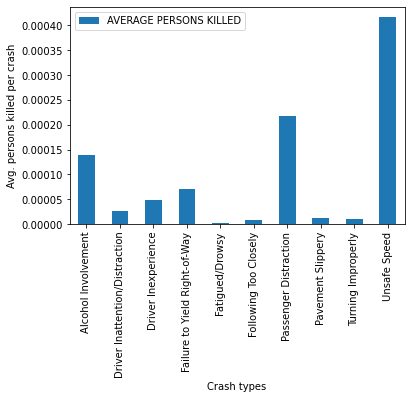

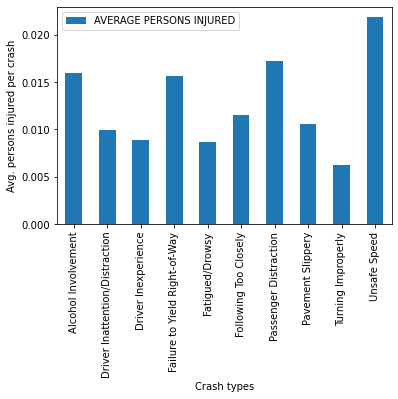

In [9]:
sum_df_kill.plot(kind='bar', ylabel='Avg. persons killed per crash', xlabel='Crash types')
sum_df_injured.plot(kind='bar', ylabel='Avg. persons injured per crash', xlabel='Crash types')

plt.show()

In [10]:
speedingData = data[data['CONTRIBUTING FACTOR VEHICLE 1'] == 'Unsafe Speed']
heatspeed = [[[row['LATITUDE'],row['LONGITUDE']] for index, row in speedingData[speedingData['CRASH TIME'] == i].iterrows()] for i in range(0,23)]
lat =  40.76416398327681
lon = -73.97941864394394
NYCmap = folium.Map([lat,lon], zoom_start=13)
heatmap = plugins.HeatMapWithTime(heatspeed, auto_play=True, radius=10)
heatmap.add_to(NYCmap)
NYCmap

In [11]:
NYCmap = folium.Map([lat, lon], zoom_start=10, zoom_control = False,scrollWheelZoom=False,dragging=False)
crashHeat= [[row['LATITUDE'],row['LONGITUDE']] for index, row in speedingData.iterrows()]
folium.Circle([40.60008630645886, -73.76139759409564],color = 'PURPLE', radius = 1000).add_to(NYCmap)
folium.Circle([40.671507849222266, -73.89555188877128],color = 'PURPLE', radius = 1500).add_to(NYCmap)
folium.Circle([40.84402799940109, -73.91364388960896],color = 'PURPLE', radius = 2200).add_to(NYCmap)
HeatMap(crashHeat, radius=12, max_zoom=5).add_to(NYCmap)
NYCmap

<AxesSubplot:xlabel='CRASH TIME', ylabel='amount of crashes'>

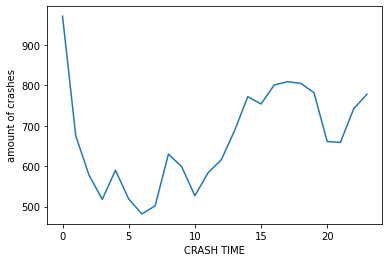

In [12]:
crashHours = speedingData.groupby('CRASH TIME').size()
crashHours.plot(kind = 'line', ylabel='amount of crashes')

<AxesSubplot:xlabel='CRASH DATE', ylabel='amount of crashes'>

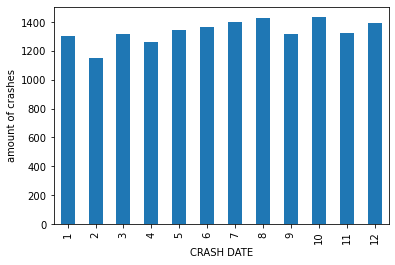

In [13]:
crashHours = speedingData.groupby(speedingData['CRASH DATE'].dt.month).size()
crashHours.plot(kind = 'bar', ylabel='amount of crashes')

In [20]:
hours = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
hoursStrings=['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23']
focusCrashesSet = (['Driver Inattention/Distraction', 'Failure to Yield Right-of-Way', 'Following Too Closely', 'Fatigued/Drowsy', 'Unsafe Speed', 'Alcohol Involvement', 'Pavement Slippery', 'Passenger Distraction', 'Driver Inexperience', 'Turning Improperly'])
normalizedData = pd.DataFrame(hours, columns=['Hours'])
for x in focusCrashesSet:
    hoursArray=[]
    for i in range(0,24):
        hoursArray.append(data[(data['CONTRIBUTING FACTOR VEHICLE 1'] == x) & (data['CRASH TIME'] == i)].size/data[data['CONTRIBUTING FACTOR VEHICLE 1'] == x].size)
    normalizedData[x] = hoursArray

In [21]:
normalizedData

,Hours,Driver Inattention/Distraction,Failure to Yield Right-of-Way,Following Too Closely,Fatigued/Drowsy,Unsafe Speed,Alcohol Involvement,Pavement Slippery,Passenger Distraction,Driver Inexperience,Turning Improperly
0,0,0.031385,0.025239,0.030046,0.019260,0.060529,0.087309,0.040308,0.043159,0.033700,0.031846
1,1,0.015115,0.010301,0.011054,0.012528,0.042077,0.078372,0.026651,0.020680,0.017381,0.014216
2,2,0.011141,0.006972,0.007521,0.008949,0.036030,0.070143,0.021082,0.016484,0.013089,0.010404
3,3,0.009681,0.004756,0.005495,0.007640,0.032290,0.073100,0.019027,0.010790,0.011942,0.007915
4,4,0.010858,0.005534,0.006647,0.007800,0.036778,0.086151,0.027247,0.012738,0.012239,0.008259
5,5,0.012502,0.007685,0.009636,0.009403,0.032353,0.054520,0.029700,0.007942,0.011644,0.010457
6,6,0.020910,0.017013,0.022107,0.018805,0.030046,0.036261,0.038584,0.014986,0.016574,0.021072
7,7,0.027991,0.030319,0.034959,0.026525,0.031293,0.020252,0.045678,0.022629,0.024946,0.029570
8,8,0.052866,0.061341,0.057079,0.056977,0.039272,0.021024,0.071268,0.041061,0.044367,0.056810
9,9,0.052515,0.054326,0.053306,0.057271,0.037339,0.016330,0.059533,0.039113,0.045939,0.056678


In [22]:
source = ColumnDataSource(normalizedData)
p = figure(x_range = FactorRange(factors=hoursStrings), x_axis_label = "hour of the day",width = 1500, margin = 10)
bar = {}
items = []
colors= ['#ff0000', '#ff5e00', '#ffd900', '#c8ff00', '#3cff00', '#00ffb7', '#00eaff', '#005eff', '#7300ff', '#d000ff']
for index, i in enumerate(focusCrashes):
    bar[i] = p.vbar(x="Hours", top = i, source = source, muted_alpha= 0.05, muted=True, fill_color=colors[index], width=(0.90))
    items.append((i,[bar[i]]))
legend = Legend(items = items, location=(0,-30))
p.add_layout(legend, 'left')
p.legend.click_policy="mute"
show(p)